# Bike/Scooter price prediction using machine learning algorithm...

### I used the Python scikit-learn module to perform a whole end-to-end model creation process for this project, starting with feature engineering and ending with model building. Python's pandas and numpy libraries are utilised for EDA and feature engineering, while matplotlib and seaborn are used for data visualisation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid") # importing required libraries

In [2]:
bike_data = pd.read_csv("bike_dataset.csv")

In [3]:
bike_data.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [4]:
bike_data.shape

(361, 9)

Our dataset contain 9 columns and 361 rows. We are doing our analysis on a small dataset

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  304 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  170 non-null    float64
 8   top_speed           200 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.5+ KB


In [6]:
bike_data.nunique() # Number of unique values per column

model_name            361
price                 344
CC                    129
mileage               110
type_of_bike            2
weight_in_kg          183
links                 361
acceleration_speed     70
top_speed              66
dtype: int64

In [7]:
bike_data.isnull().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64

Columns with missing value are "CC","acceleration_speed" and "top_speed" with have to come up with some technique for dealing with these missing values.

In [8]:
missing_values_percent = (bike_data.isnull().sum() / len(bike_data)) * 100
missing_values_df = pd.DataFrame({"% Missing values": missing_values_percent})
missing_values_df.index = bike_data.columns

In [9]:
missing_values_df

,% Missing values
model_name,0.000000
price,0.000000
CC,15.789474
mileage,0.000000
type_of_bike,0.000000
weight_in_kg,0.000000
links,0.000000
acceleration_speed,52.908587
top_speed,44.598338


In [10]:
bike_data.describe() # Summary of our dataset

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
count,3.610000e+02,304.000000,361.000000,361.000000,170.000000,200.000000
mean,8.399079e+05,680.973684,44.681413,178.839335,4.193412,99.338650
std,1.052083e+06,547.744364,39.890270,73.839516,2.369334,39.631992
min,3.800000e+04,87.800000,8.000000,55.000000,1.010000,25.000000
25%,1.000000e+05,164.425000,20.000000,118.000000,2.800000,79.500000
50%,2.420000e+05,618.000000,30.000000,169.000000,3.215000,100.000000
75%,1.459000e+06,1051.500000,55.000000,216.000000,5.075000,129.115000
max,7.990000e+06,2458.000000,320.000000,433.000000,13.800000,200.000000


In [11]:
bike_data["type_of_bike"].value_counts()

Petrol Bike      304
Electric Bike     57
Name: type_of_bike, dtype: int64

This shows that our data is also unbalanched in nature

In [12]:
bike_data.dtypes

model_name             object
price                   int64
CC                    float64
mileage               float64
type_of_bike           object
weight_in_kg            int64
links                  object
acceleration_speed    float64
top_speed             float64
dtype: object

In [14]:
num_colums = [i for i in bike_data.columns if bike_data[i].dtype!='O']

In [15]:
num_colums

['price', 'CC', 'mileage', 'weight_in_kg', 'acceleration_speed', 'top_speed']

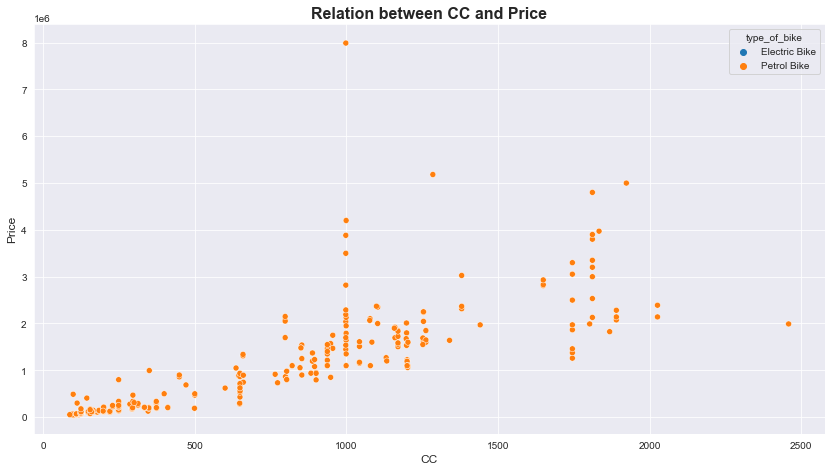

In [16]:
plt.figure(figsize=(12,7))
_ = sns.scatterplot(x="CC",y="price",data=bike_data,hue="type_of_bike")
plt.title("Relation between CC and Price",fontsize=16, fontweight='bold')
sns.set(font_scale=1.8)
plt.xlabel("CC",fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.tight_layout()
plt.show()

With the increase in engine size(CC) the price of the vehicle increses which is kind of obvious.

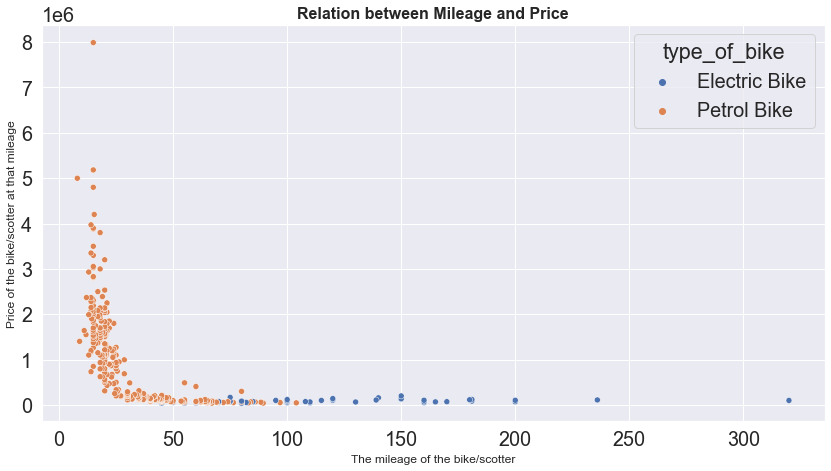

In [20]:
plt.figure(figsize=(12,7))
_ = sns.scatterplot(x="mileage",y="price",data=bike_data,hue="type_of_bike")
plt.xlabel("The mileage of the bike/scotter",fontsize=12)
plt.ylabel("Price of the bike/scotter at that mileage",fontsize=12)
plt.title("Relation between Mileage and Price",fontsize=16, fontweight='bold')
sns.set(font_scale=1.8)
plt.tight_layout()
plt.show()

### Observations :- 
- This here show an interesting trend in our dataset, mileage of electric bike are generally higher than that of petrol bike.
- Price of electric bike are lower than petrol bike, maybe this is due to less number of electric bike data available.
- Most of the bikes are having a mileage of less than 50.
- With decrease in mileage, price of the bike increase. we can verify this by looking into our surrounding where most of the expensive bike are having low mileage.

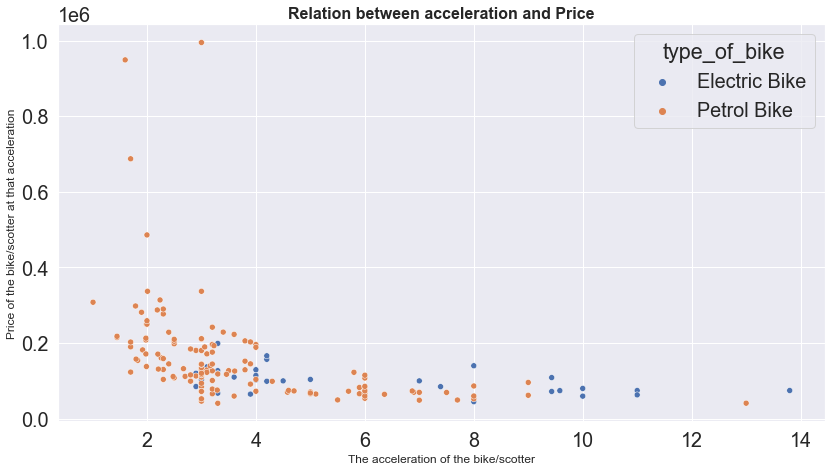

In [21]:
plt.figure(figsize=(12,7))
_ = sns.scatterplot(x="acceleration_speed",y="price",data=bike_data,hue="type_of_bike")
plt.xlabel("The acceleration of the bike/scotter",fontsize=12)
plt.ylabel("Price of the bike/scotter at that acceleration",fontsize=12)
plt.title("Relation between acceleration and Price",fontsize=16, fontweight='bold')
sns.set(font_scale=1.8)
plt.tight_layout()
plt.show()

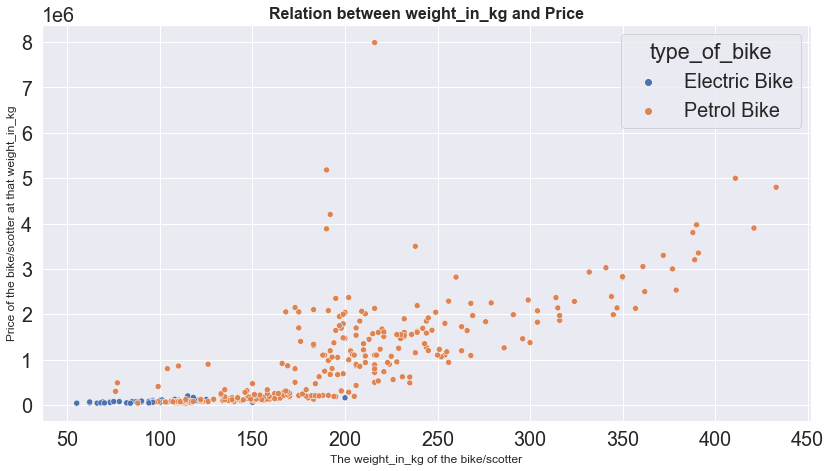

In [22]:
plt.figure(figsize=(12,7))
_ = sns.scatterplot(x="weight_in_kg",y="price",data=bike_data,hue="type_of_bike")
plt.xlabel("The weight_in_kg of the bike/scotter",fontsize=12)
plt.ylabel("Price of the bike/scotter at that weight_in_kg",fontsize=12)
plt.title("Relation between weight_in_kg and Price",fontsize=16, fontweight='bold')
sns.set(font_scale=1.8)
plt.tight_layout()
plt.show()

With increase in weight of the bike price of the bike generally increases.

### Now let's look at the distribution of the numerical data points of the columns.

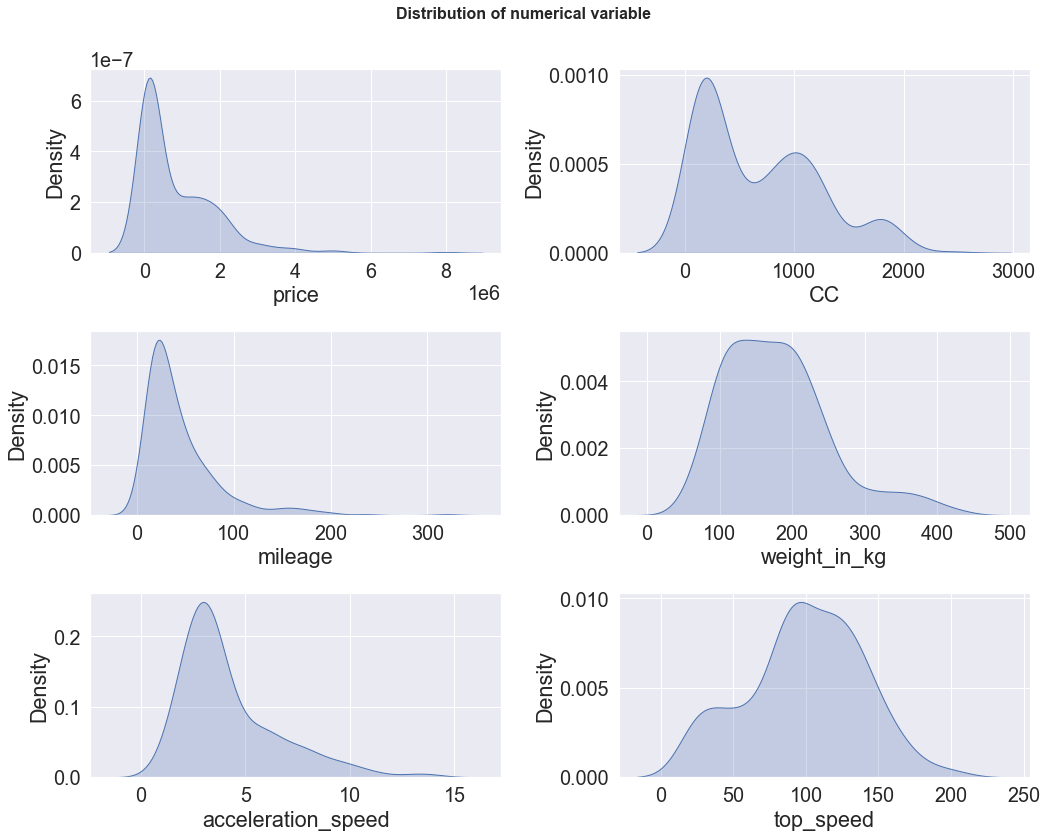

In [23]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,12))
sns.set_style("darkgrid")
for i,j in zip(num_colums,ax.flatten()):
    sns.kdeplot(i,data=bike_data,ax=j,fill=True)
    
plt.suptitle("Distribution of numerical variable",fontsize=16, fontweight='bold')
sns.set(font_scale=1.8)

plt.tight_layout()
plt.show()

From this kdeplot we can see that most of  our numerical columns are right skewed, we need to do something about it. 

In [24]:
bike_data.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [25]:
### Let's do some groupby analysis based on type of bike

In [26]:
bike_type_grouped = bike_data.groupby("type_of_bike").mean()

In [27]:
bike_type_grouped

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
type_of_bike,,,,,,
Electric Bike,80704.596491,NaN,111.578947,98.701754,6.166562,55.157895
Petrol Bike,982258.569079,680.973684,32.138125,193.865132,3.735870,116.949161


In [28]:
bike_type_grouped_median = bike_data.groupby("type_of_bike").median()

In [29]:
bike_type_grouped_median.reset_index(inplace=True)

### Now let's check the presence of outliers based on different groups and deal with them later on.

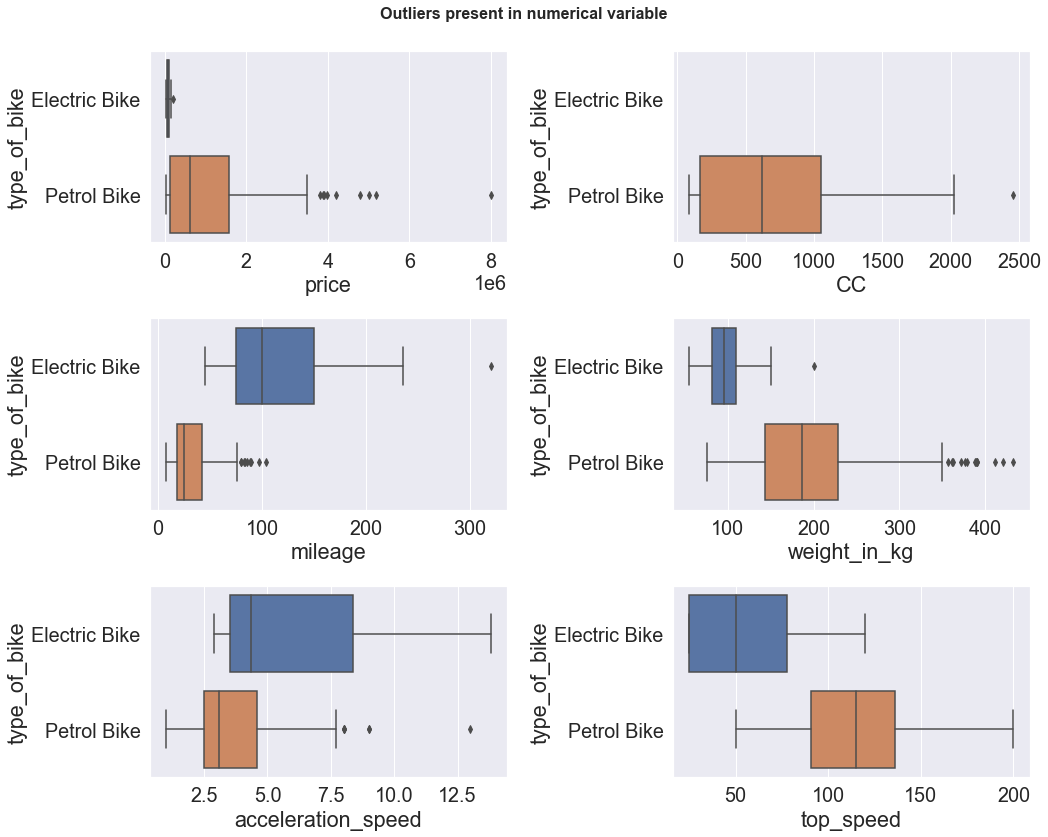

In [30]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,12))
sns.set_style("darkgrid")
for i,j in zip(num_colums,ax.flatten()):
    sns.boxplot(x=i,data=bike_data,ax=j,y=bike_data["type_of_bike"])
    
plt.suptitle("Outliers present in numerical variable",fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

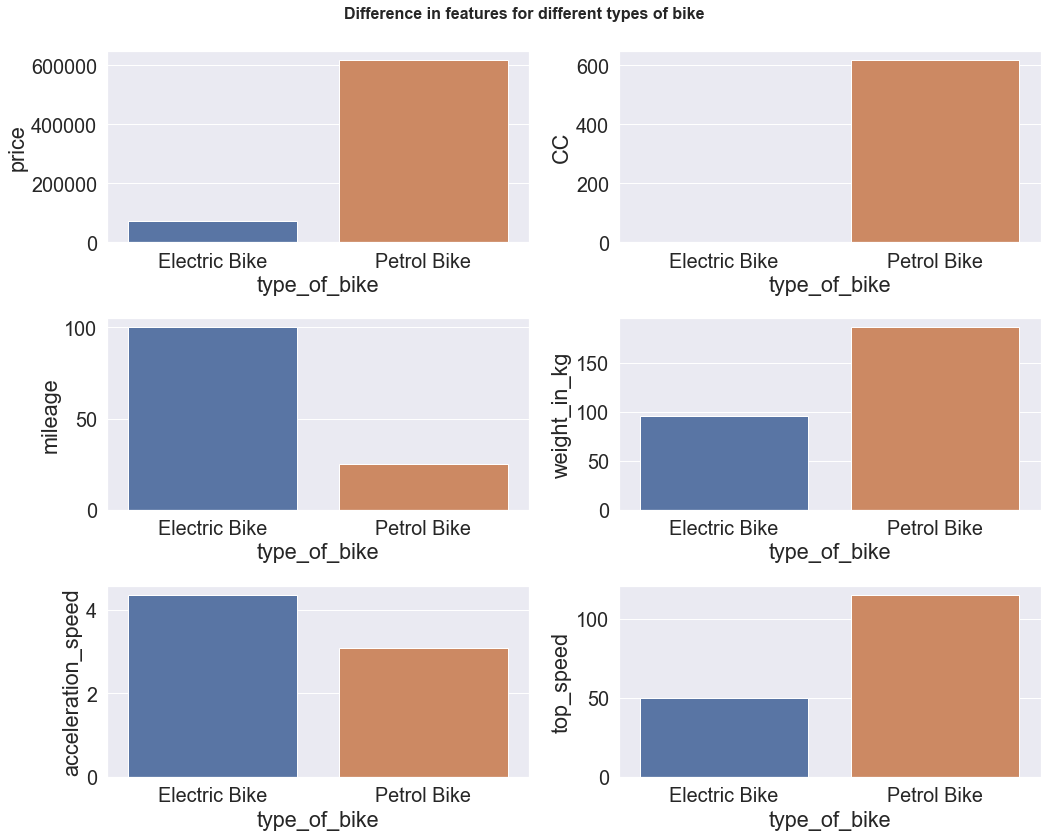

In [31]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,12))
sns.set_style("darkgrid")
for i,j in zip(bike_type_grouped_median.columns[1:],ax.flatten()):
    sns.barplot(x=bike_type_grouped_median["type_of_bike"],data=bike_type_grouped_median,ax=j,y=i)
    
plt.suptitle("Difference in features for different types of bike",fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show() ## Categorical analysis based on different types of bikes

In [32]:
bike_data.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [33]:
bike_data.drop(columns=["model_name","links"],axis=1,inplace=True)

In [34]:
bike_data.head()

,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,99000,NaN,320.0,Electric Bike,100,4.2,70.0
1,109999,NaN,236.0,Electric Bike,110,3.6,100.0
2,69900,NaN,200.0,Electric Bike,95,NaN,25.0
3,102999,NaN,200.0,Electric Bike,120,3.0,100.0
4,85099,NaN,181.0,Electric Bike,121,2.9,116.0


In [35]:
bike_data[bike_data["acceleration_speed"].isnull()]["type_of_bike"].value_counts()

Petrol Bike      166
Electric Bike     25
Name: type_of_bike, dtype: int64

In [36]:
bike_data[bike_data["top_speed"].isnull()]["type_of_bike"].value_counts() # All the missing values from top speed columns is from petrol bike.

Petrol Bike    161
Name: type_of_bike, dtype: int64

In [37]:
bike_data[bike_data["top_speed"].isnull()]["acceleration_speed"].unique()

array([nan])

Means rows  whose top speed not known there acceleration speed will also be nan.

In [38]:
bike_data["CC"] = bike_data["CC"].fillna(0) ## All the missing values from "CC" columns is from electric bike, and we know that electric bike doesn't have engine so we fill it with 0.

In [39]:
bike_data.head()

,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,99000,0.0,320.0,Electric Bike,100,4.2,70.0
1,109999,0.0,236.0,Electric Bike,110,3.6,100.0
2,69900,0.0,200.0,Electric Bike,95,NaN,25.0
3,102999,0.0,200.0,Electric Bike,120,3.0,100.0
4,85099,0.0,181.0,Electric Bike,121,2.9,116.0


#### Let's deal with the skewness of our distribution, we will apply log transformation.

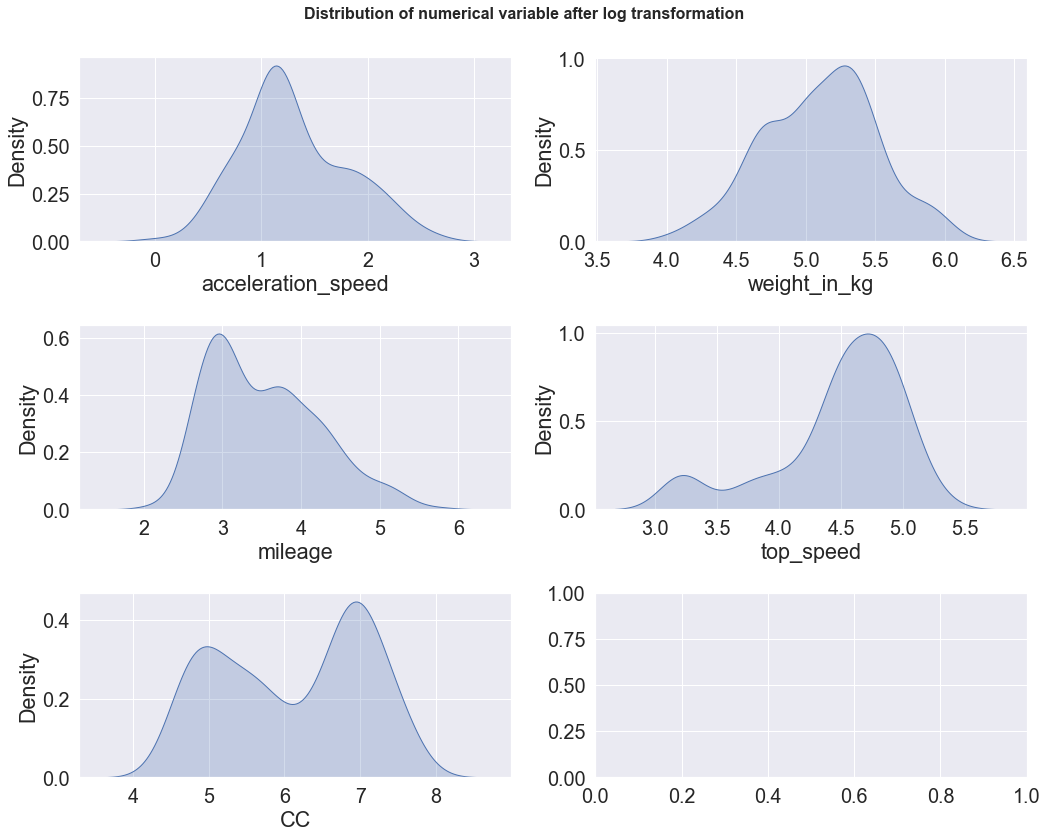

In [41]:
skewed_columns = ["acceleration_speed","weight_in_kg","mileage","top_speed","CC"]
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,12))
sns.set_style("darkgrid")
for i,j in zip(skewed_columns,ax.flatten()):
    sns.kdeplot(np.log(bike_data[i]),data=bike_data,ax=j,fill=True)
    
plt.suptitle("Distribution of numerical variable after log transformation",fontsize=16, fontweight='bold')
sns.set(font_scale=1.8)

plt.tight_layout()
plt.show()

This seems better than our original distribution so we will apply log transformation on these columns.

In [42]:
final_data = bike_data.copy()

In [43]:
final_data.head()

,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,99000,0.0,320.0,Electric Bike,100,4.2,70.0
1,109999,0.0,236.0,Electric Bike,110,3.6,100.0
2,69900,0.0,200.0,Electric Bike,95,NaN,25.0
3,102999,0.0,200.0,Electric Bike,120,3.0,100.0
4,85099,0.0,181.0,Electric Bike,121,2.9,116.0


In [44]:
min_bike_data_grouped = bike_data.groupby("type_of_bike").min()
max_bike_data_grouped = bike_data.groupby("type_of_bike").max()

In [45]:
min_bike_data_grouped

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
type_of_bike,,,,,,
Electric Bike,38000,0.0,45.0,55,2.90,25.0
Petrol Bike,40794,87.8,8.0,76,1.01,50.0


In [46]:
max_bike_data_grouped

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
type_of_bike,,,,,,
Electric Bike,199000,0.0,320.0,200,13.8,120.0
Petrol Bike,7990000,2458.0,104.0,433,13.0,200.0


In [47]:
skewed_columns[0:-1]

['acceleration_speed', 'weight_in_kg', 'mileage', 'top_speed']

In [48]:
for i in skewed_columns[0:-1]:
    final_data[i]=np.log(final_data[i])

In [49]:
final_data.head()

,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,99000,0.0,5.768321,Electric Bike,4.605170,1.435085,4.248495
1,109999,0.0,5.463832,Electric Bike,4.700480,1.280934,4.605170
2,69900,0.0,5.298317,Electric Bike,4.553877,NaN,3.218876
3,102999,0.0,5.298317,Electric Bike,4.787492,1.098612,4.605170
4,85099,0.0,5.198497,Electric Bike,4.795791,1.064711,4.753590


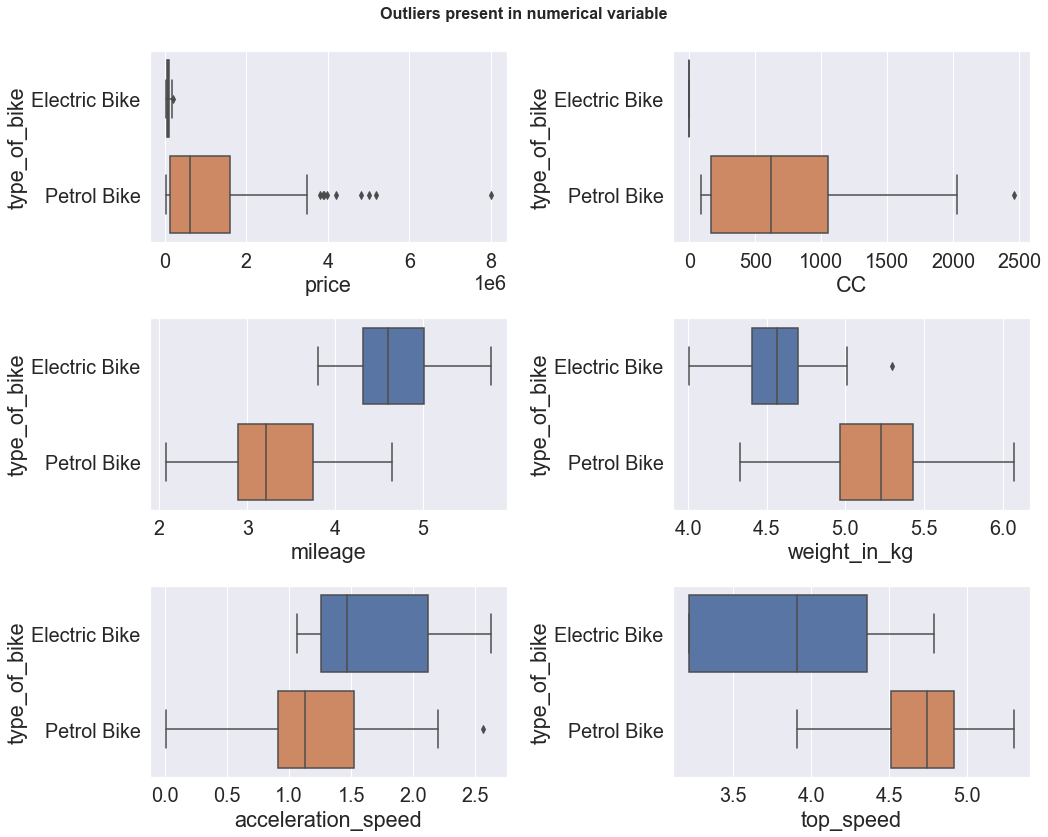

In [50]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,12))
sns.set_style("darkgrid")
for i,j in zip(num_columsn,ax.flatten()):
    sns.boxplot(x=i,data=final_data,ax=j,y=final_data["type_of_bike"])
    
plt.suptitle("Outliers present in numerical variable",fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

Now the presence of outliers also significantly decreases.

In [51]:
Column_with_missing_values = ["acceleration_speed","top_speed"]

In [55]:
d2 = final_data.copy()

In [56]:
## Filling for electric vehicle
electric_mask = d2["type_of_bike"] == "Electric Bike"
for i in Column_with_missing_values:
    d2.loc[electric_mask, i] = d2.loc[electric_mask, i].fillna(method="ffill")

## Filling for petrol vehicle
petrol_mask = d2["type_of_bike"] == "Petrol Bike"
for i in Column_with_missing_values:
    petrol_median = d2.loc[petrol_mask, i].mean()
    d2.loc[petrol_mask, i] = d2.loc[petrol_mask, i].fillna(method="ffill")


In [57]:
d2.isnull().sum()

price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
acceleration_speed    0
top_speed             0
dtype: int64

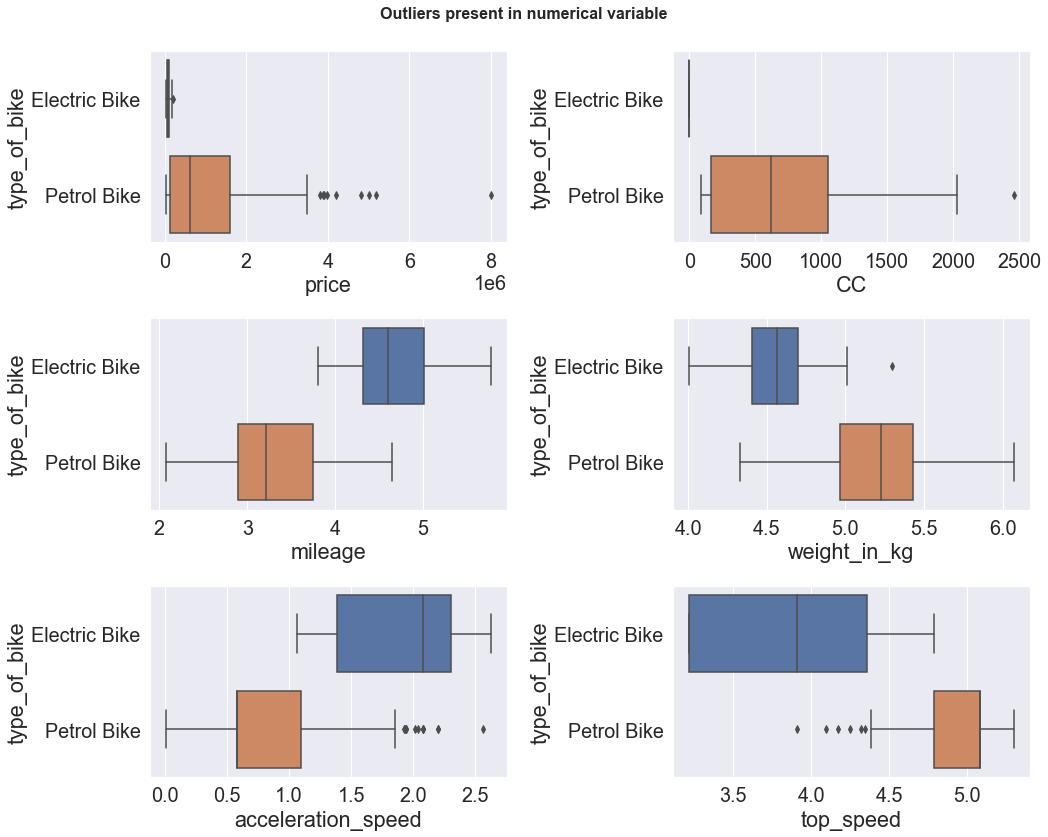

In [58]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,12))
sns.set_style("darkgrid")
for i,j in zip(num_columsn,ax.flatten()):
    sns.boxplot(x=i,data=d2,ax=j,y=d2["type_of_bike"])
    
plt.suptitle("Outliers present in numerical variable",fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show() ## Checking for outliers after filling the missing values.

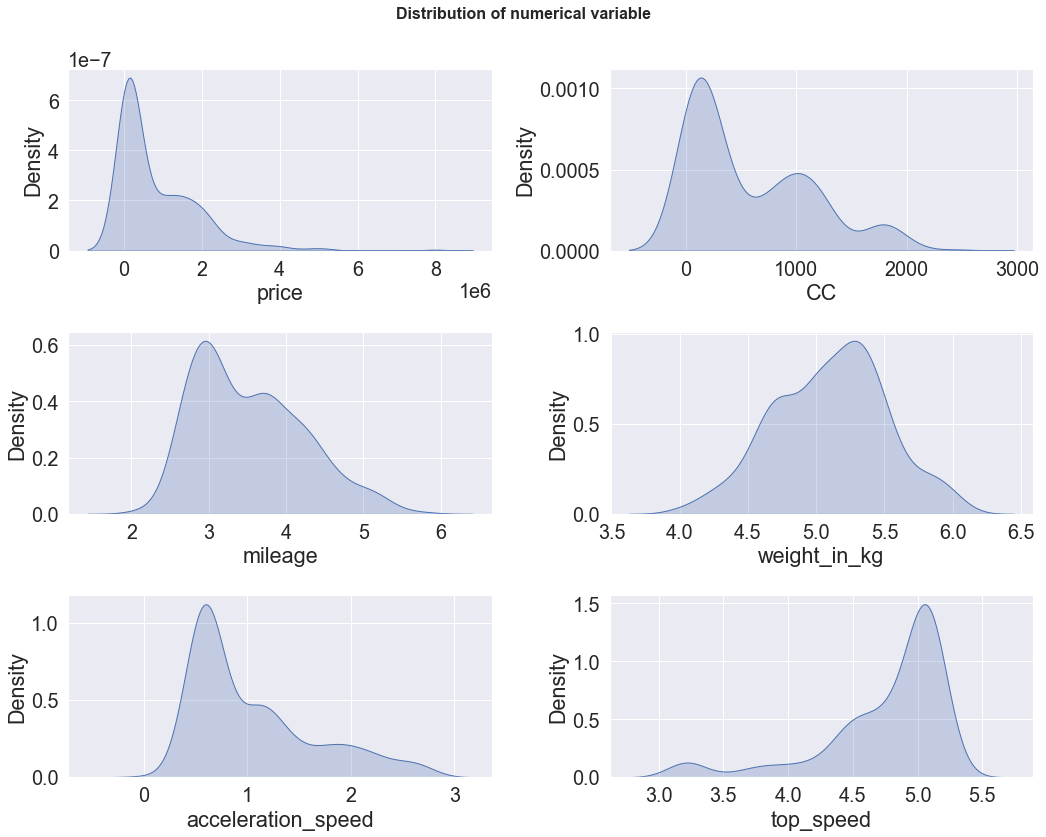

In [59]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,12))
sns.set_style("darkgrid")
for i,j in zip(num_columsn,ax.flatten()):
    sns.kdeplot(i,data=d2,ax=j,fill=True)
    
plt.suptitle("Distribution of numerical variable",fontsize=16, fontweight='bold')
sns.set(font_scale=1.8)

plt.tight_layout()
plt.show()

In [60]:
d2.head()

,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,99000,0.0,5.768321,Electric Bike,4.605170,1.435085,4.248495
1,109999,0.0,5.463832,Electric Bike,4.700480,1.280934,4.605170
2,69900,0.0,5.298317,Electric Bike,4.553877,1.280934,3.218876
3,102999,0.0,5.298317,Electric Bike,4.787492,1.098612,4.605170
4,85099,0.0,5.198497,Electric Bike,4.795791,1.064711,4.753590


In [61]:
d2["type_of_bike"] = d2["type_of_bike"].map({"Electric Bike":0,"Petrol Bike":1})

In [62]:
d2.head()

,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,99000,0.0,5.768321,0,4.605170,1.435085,4.248495
1,109999,0.0,5.463832,0,4.700480,1.280934,4.605170
2,69900,0.0,5.298317,0,4.553877,1.280934,3.218876
3,102999,0.0,5.298317,0,4.787492,1.098612,4.605170
4,85099,0.0,5.198497,0,4.795791,1.064711,4.753590


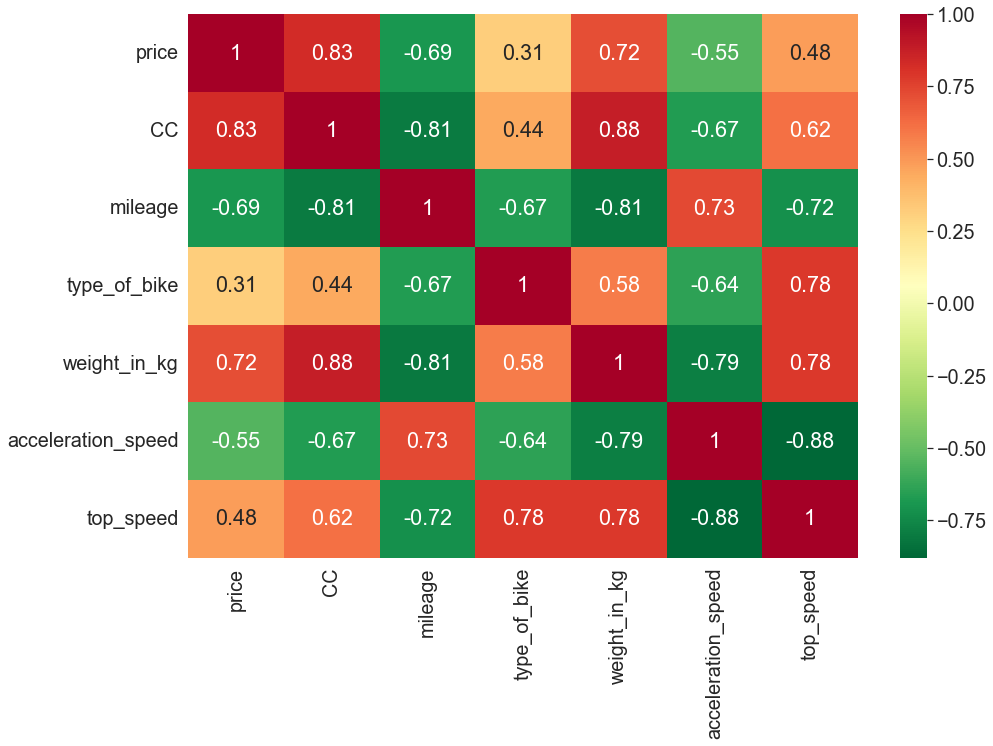

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(d2.corr(),annot=True,cmap="RdYlGn_r")
plt.show()

In [64]:
predictor = d2.drop("price",axis=1)
label = d2["price"]

## Predictive model building using python library

In [65]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
x_train,x_test,y_train,y_test = train_test_split(predictor,label,random_state=40,test_size=0.2)

Dividing our dataset into training and testing set.

In [67]:
print(x_train.shape,x_test.shape)

(288, 6) (73, 6)


In [68]:
# Building a linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_linear = linear_model.predict(x_train)
print("The actual values for 1st five observation is ",y_train[0:5])
print("The predicted value for 1st five observation is ",y_pred_linear[0:5])

The actual values for 1st five observation is  340    2052356
256    1215000
139      85431
204     499000
53      166358
Name: price, dtype: int64
The predicted value for 1st five observation is  [1452054.27941704 1474212.82497624  115743.45912476  678224.05171027
  159899.76432359]


In [69]:
print("The r2 score for this model is ",r2_score(y_train,y_pred_linear)) # Determining performance metric of our model

The r2 score for this model is  0.6767324265407257


Our simple linear regression model perform poorly on this dataset which is kind of obvious because we here included a bias by assuming that our predictor and labels follow linear relation.

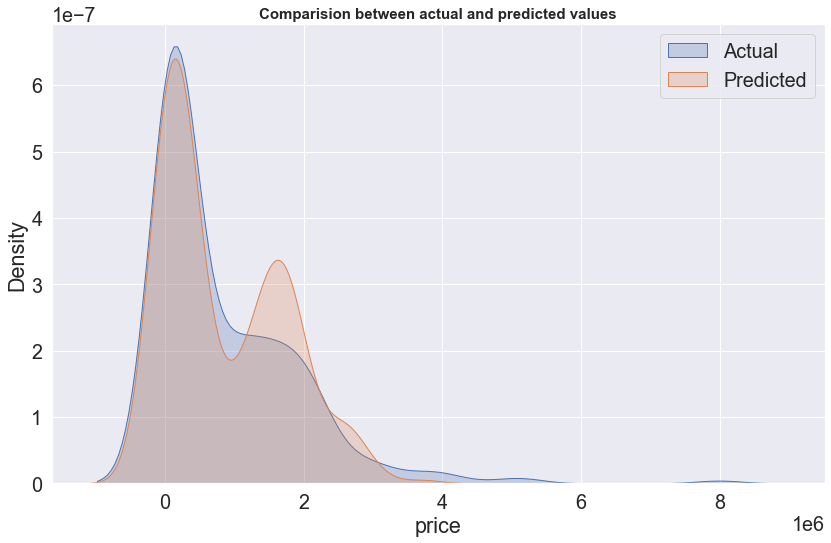

In [70]:
plt.figure(figsize=(12,8))
ax = sns.kdeplot(y_train,fill=True,label="Actual")
ax = sns.kdeplot(y_pred_linear,fill=True,label="Predicted")
plt.title("Comparision between actual and predicted values",fontweight="bold",fontsize=15)
plt.legend()
plt.tight_layout()
plt.show() ## Let's visualize where our model lacks

In [71]:
def visualize(y_train,y_pred):
    plt.figure(figsize=(12,8))
    ax = sns.kdeplot(y_train,fill=True,label="Actual")
    ax = sns.kdeplot(y_pred,fill=True,label="Predicted")
    plt.title("Comparision between actual and predicted values",fontweight="bold",fontsize=15)
    plt.legend()
    plt.tight_layout()
    plt.show()  ## Helper function for visualizing our actual and predicted values.

In [72]:
## Let's try polynomial regression of degree 3
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_train)
linear_model.fit(x_poly,y_train)
y_pred_poly = linear_model.predict(x_poly)
print("The r2 score for this 3rd degree polynomial regression is ",r2_score(y_train,y_pred_poly))

The r2 score for this 3rd degree polynomial regression is  0.7727160035095076


This shows improvement from our linear model let's proceed further.

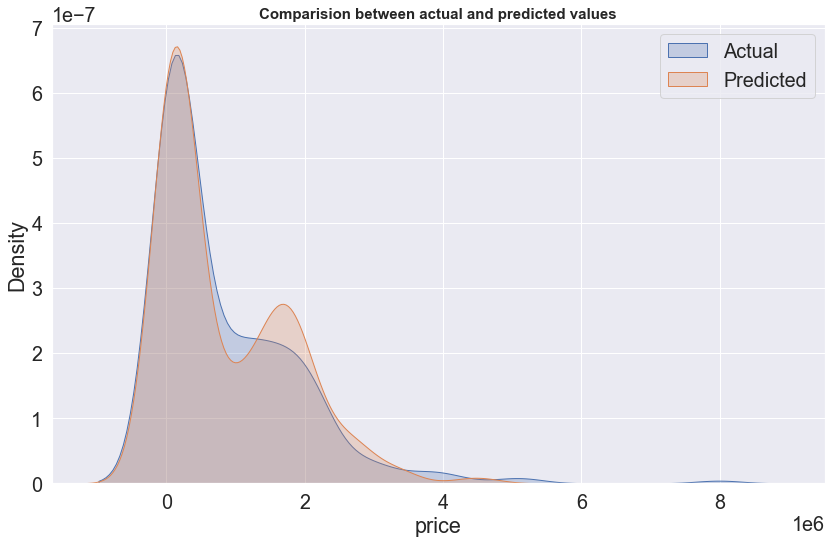

In [73]:
visualize(y_train,y_pred_poly)

The R2 score of this model is: 0.7730992771453831


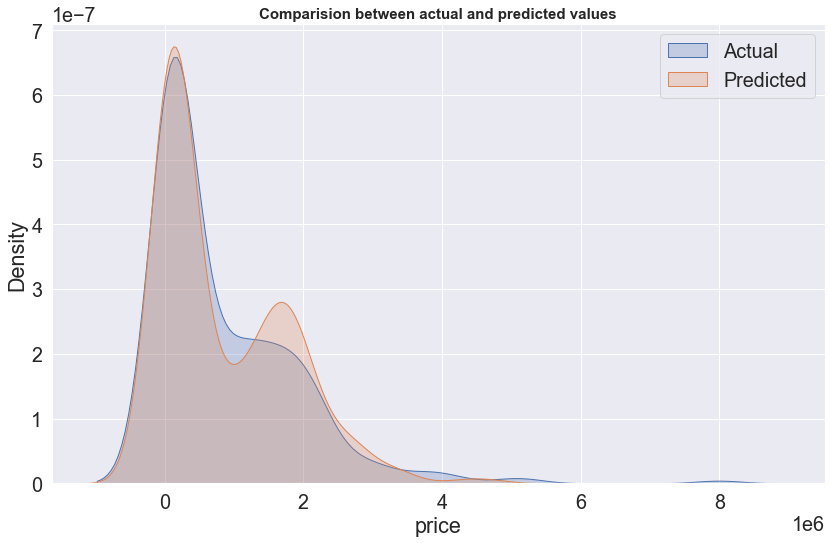

In [74]:
### Let's see if there is any difference after scaling the data points
steps = [("scaler", StandardScaler()), ("model", LinearRegression())]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(x_poly, y_train)

# Calculate and print the R2 score
r2 = r2_score(y_train, pipeline.predict(x_poly))
print("The R2 score of this model is:", r2)

# Visualize the results
visualize(y_train, pipeline.predict(x_poly))

Scaling our data points doesn't shows any significant improvement.

In [75]:
def cross_validation(model,x_data,y_data,s):
    score = cross_val_score(model,x_data,y_data,cv=s,scoring="neg_mean_squared_error")
    print(np.sqrt(-score))
    print("The mean of the cross validation score is ",np.sqrt(-score).mean())
    print("The standard deviation of the cross validation score is ",np.sqrt(-score).std())
    # Helper function for determinig does our model overfit our dataset

In [76]:
cross_validation(pipeline,x_poly,y_train,5)

[ 858680.37516819  846737.11326293 1195409.61783408  927642.8469917
 1107420.74290236]
The mean of the cross validation score is  987178.1392318516
The standard deviation of the cross validation score is  139712.87742009512


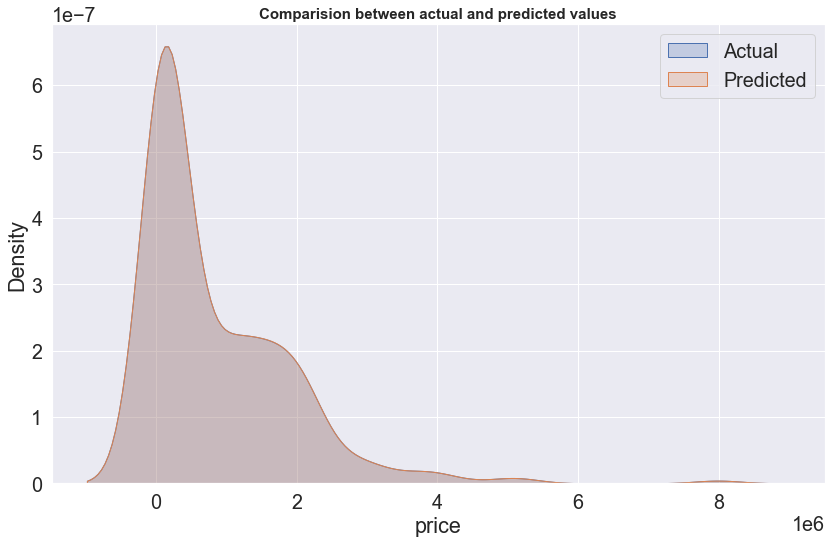

The r2 score of the decision tree model is  0.999927890987458
The mean squared error of the decision tree model is  8931.184637425082


In [77]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
visualize(y_train,tree_model.predict(x_train))
print("The r2 score of the decision tree model is ",r2_score(y_train,tree_model.predict(x_train)))
print("The mean squared error of the decision tree model is ",np.sqrt(mean_squared_error(y_train,tree_model.predict(x_train))))

##### Our decision tree model is clearly overfitting, so we need to do something about it

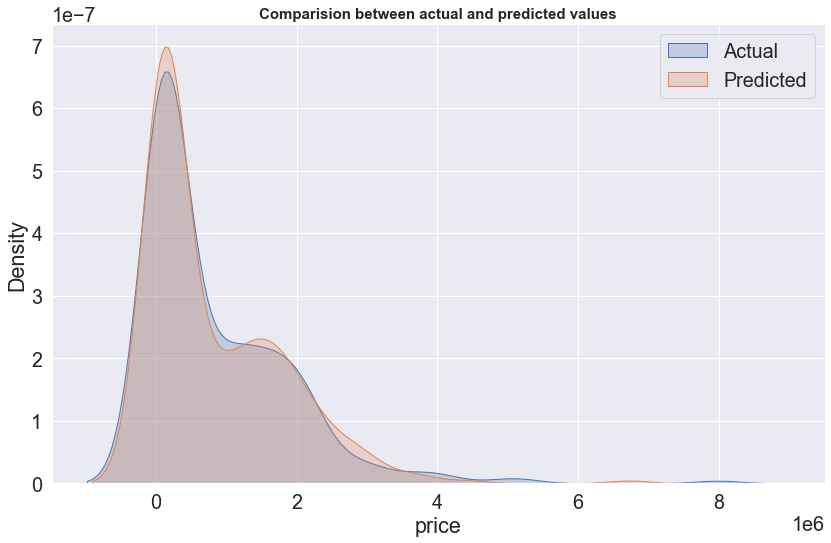

The r2 score of the decision tree model is  0.9479069528654589
The mean squared error of the decision tree model is  240051.36205012834


In [78]:
## Random forest model building it is one of the powerful model
random_forest_model = RandomForestRegressor(n_estimators=5)
random_forest_model.fit(x_train,y_train)
visualize(y_train,random_forest_model.predict(x_train))
print("The r2 score of the decision tree model is ",r2_score(y_train,random_forest_model.predict(x_train)))
print("The mean squared error of the decision tree model is ",np.sqrt(mean_squared_error(y_train,random_forest_model.predict(x_train))))

### Random forest is the best model till now

In [79]:
## Let's do some cross validation for determing overfitting conditions
cross_validation(random_forest_model,x_train,y_train,6)

[503971.92677174 287148.96314672 513559.80933244 497748.80742378
 721029.77505324 901759.7781708 ]
The mean of the cross validation score is  570869.8433164534
The standard deviation of the cross validation score is  193924.44794072484


Cross validation score generally means the scoring criteria that we used for generating cross validation set like mean squared error

In [80]:
cross_validation(tree_model,x_train,y_train,6)

[507370.26142033 244492.66684892 956024.01517331 284522.07138844
 752403.60852878 966018.11271514]
The mean of the cross validation score is  618471.789345819
The standard deviation of the cross validation score is  293369.5144162718


In [81]:
### Let's estimate the best hyperparameter using grid search cv
def estimate_best_hyperparameter(x_data,y_data,model,para,s):
    grid_model = GridSearchCV(model,param_grid=para,cv=s,scoring="neg_mean_squared_error")
    grid_model.fit(x_data,y_data)
    print("The best hyperparameters for this model is ",grid_model.best_params_)
    print("The best score obtained for this model is ",np.sqrt(-grid_model.best_score_)) # helper function

In [82]:
para1 = {
    "max_depth":[3,6,8,10,11,12,15],
    "min_samples_split":[10,15,20,30,40,50,60],
    "max_features":["auto", "sqrt", "log2"]    
}

In [83]:
estimate_best_hyperparameter(x_train,y_train,tree_model,para1,5) ## Best hyperparameter for decision tree model

The best hyperparameters for this model is  {'max_depth': 11, 'max_features': 'log2', 'min_samples_split': 10}
The best score obtained for this model is  541940.2744426625


In [84]:
def tree_modelf(parameter):
    tree_model = DecisionTreeRegressor(**parameter)
    tree_model.fit(x_train,y_train)
    visualize(y_train,tree_model.predict(x_train))
    print("The r2 score of the decision tree model is ",r2_score(y_train,tree_model.predict(x_train)))
    print("The mean squared error of the decision tree model is ",np.sqrt(mean_squared_error(y_train,tree_model.predict(x_train))))
    print("Actual first 4 values",y_train[0:5])
    print("Predicted first 5 values",tree_model.predict(x_train)[0:5]) #helper function

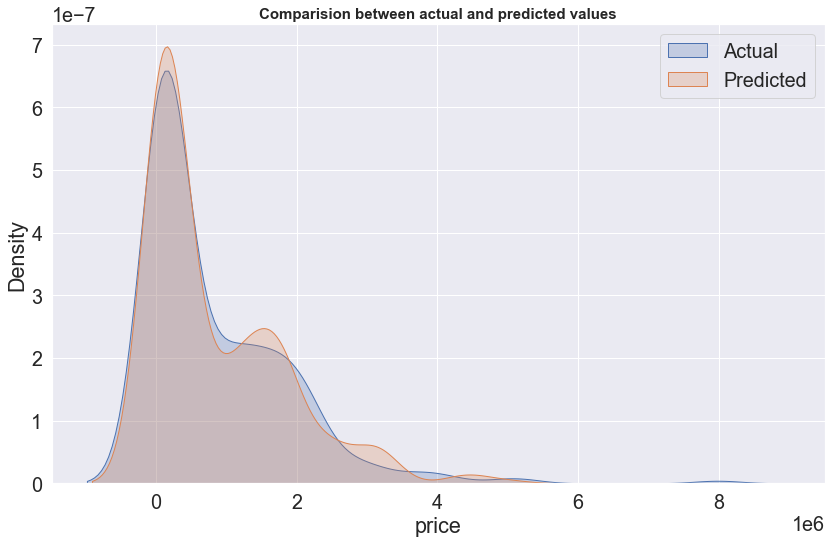

The r2 score of the decision tree model is  0.8647635058564094
The mean squared error of the decision tree model is  386777.53870389104
Actual first 4 values 340    2052356
256    1215000
139      85431
204     499000
53      166358
Name: price, dtype: int64
Predicted first 5 values [1675680.         1113571.42857143   85569.625       609483.77777778
  129750.85714286]


In [85]:
tree_modelf({'max_depth': 11, 'max_features': 'log2', 'min_samples_split': 10}) ## Best hyperparameters

In [86]:
param_r = {
    "n_estimators":[5,10,12,15],
    "max_depth":[3,6,8,10,11,12,15],
    "min_samples_split":[10,15,20,30,40,50,60],
    "max_features":["auto", "sqrt", "log2"]
}
estimate_best_hyperparameter(x_train,y_train,random_forest_model,param_r,6)

The best hyperparameters for this model is  {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 12}
The best score obtained for this model is  518001.97969392675


This is the best hyperparameter for the random forest model

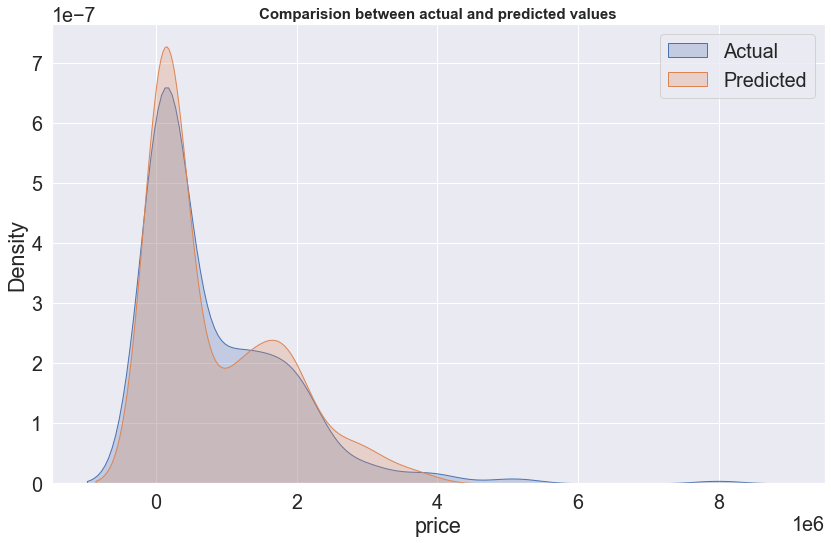

The r2 score of the Random forest model is  0.8657848203486327
The mean squared error of the Random forest model is  385314.28670077893
Actual first 4 values 340    2052356
256    1215000
139      85431
204     499000
53      166358
Name: price, dtype: int64
Predicted first 5 values [2262001.33049869 1349881.14561688   89631.43475023  539762.55862193
  115229.36990741]


In [87]:
def random_forr(parameter):
    random_forest_model = RandomForestRegressor(**parameter)
    random_forest_model.fit(x_train,y_train)
    visualize(y_train,random_forest_model.predict(x_train))
    print("The r2 score of the Random forest model is ",r2_score(y_train,random_forest_model.predict(x_train)))
    print("The mean squared error of the Random forest model is ",np.sqrt(mean_squared_error(y_train,random_forest_model.predict(x_train))))
    print("Actual first 4 values",y_train[0:5])
    print("Predicted first 5 values",random_forest_model.predict(x_train)[0:5])
    
random_forr({'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 12})

#### We are going forward with above mentioned random forest model let's see how it perform in the test set

In [88]:
Final_model = RandomForestRegressor(max_depth = 10, max_features='auto', min_samples_split = 10, n_estimators= 12)
Final_model.fit(x_train,y_train)
print("The r2 score of the Random forest model is ",r2_score(y_train,Final_model.predict(x_train)))
print("The mean squared error of the Random forest model is ",np.sqrt(mean_squared_error(y_train,Final_model.predict(x_train))))


The r2 score of the Random forest model is  0.8590986993897389
The mean squared error of the Random forest model is  394795.13706314634


In [89]:
print("Here is how our random forest model perform on the test set")
print("The r2 score of the Random forest model is ",r2_score(y_test,Final_model.predict(x_test)))
print("The mean squared error of the Random forest model is ",np.sqrt(mean_squared_error(y_test,Final_model.predict(x_test))))

Here is how our random forest model perform on the test set
The r2 score of the Random forest model is  0.8433217256573625
The mean squared error of the Random forest model is  414078.09691143065


## Our model show a r2 score of 0.84 on the test set which is actually good for making prediction.

In [90]:
# import pickle
# pickle.dump("Final_model",with(model.pkl,'wb'))

#### Our predictive model is ready